In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path="C:\\Users\\hp\\Downloads\\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


# Box Plot

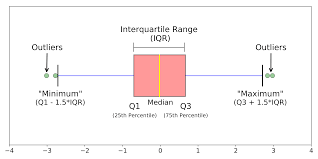

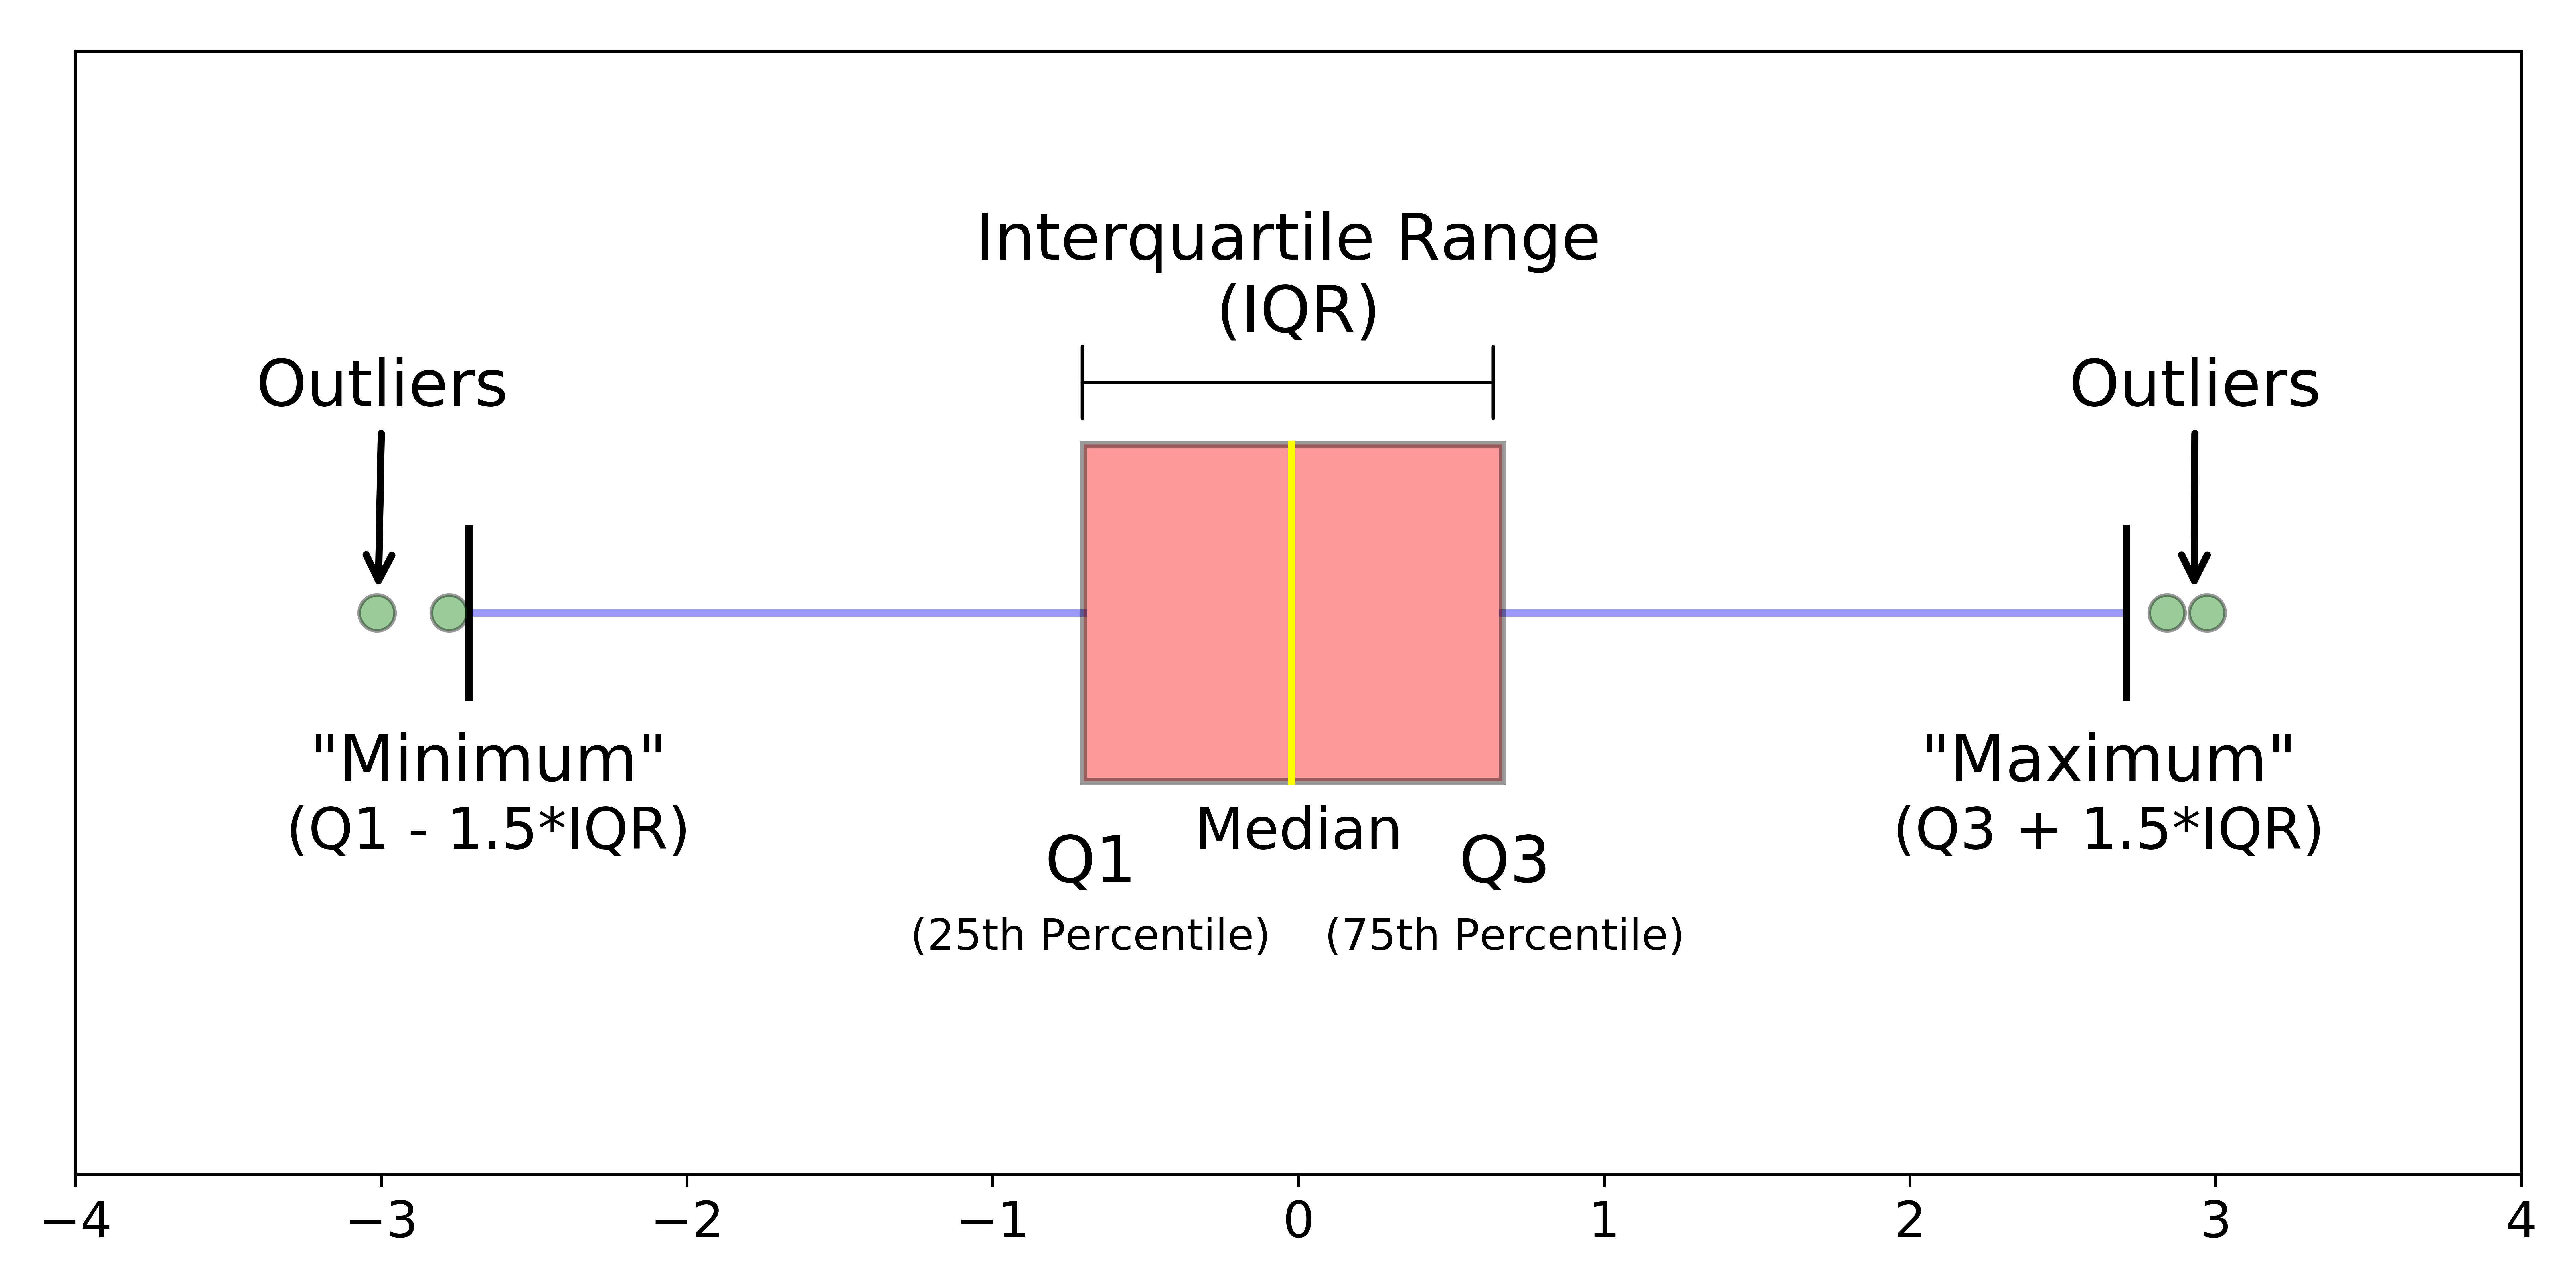

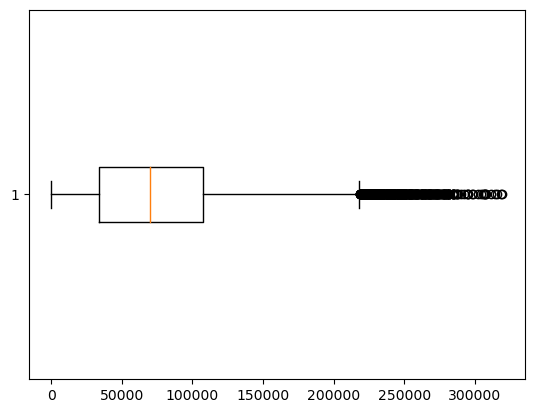

In [4]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()


# black dots are outlier


$DEALING$-$OUTLIERS$

- Removal of outliers
- Impute the outliers
     - because median is not impact by outliers
- cap the outliers with q3, which are having more than q3
- cap the outliers with q1, which are having less than q1

**Find the outliers**

- Q3+1.5*IQR >  and Q1-1.5*IQR
- step-1: calculate Q1,Q2,Q3
- step-2: calculate IQR=(Q3-Q1)
- step3: UB=Q3+1.5*IQR
- step4: LB=Q1-1.5*IQR
- step5: con1=col>UB
- step6: con2=col>LB
- step7: con1|con2
- step8: col[con1|con2]

In [5]:
q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q2=round(np.percentile(visa_df['prevailing_wage'],50),2)
q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
print(q1)
print(q2)
print(q3)


34015.48
70308.21
107735.51


In [16]:
IQR=q3-q1

UB=q3+(1.5*IQR)
LB=q1-(1.5*IQR)
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
con1|con2
visa_df['prevailing_wage'][con1|con2]
len(visa_df['prevailing_wage'][con1|con2])

427

In [19]:
def outliers():
    q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
    q2=round(np.percentile(visa_df['prevailing_wage'],50),2)
    q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
    IQR=q3-q1

    UB=q3+(1.5*IQR)
    LB=q1-(1.5*IQR)
    con1=visa_df['prevailing_wage']>UB
    con2=visa_df['prevailing_wage']<LB
    con1|con2
    outires=visa_df['prevailing_wage'][con1|con2]
    outliers_data=visa_df['prevailing_wage'][con1|con2].values
    return(outliers_data)
outliers_data=outliers()
len(outliers_data)

427

In [21]:

q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q2=round(np.percentile(visa_df['prevailing_wage'],50),2)
q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=q3-q1

UB=q3+(1.5*IQR)
LB=q1-(1.5*IQR)
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
    #con1|con2
    #outires=visa_df['prevailing_wage'][con1|con2]
outliers_df=visa_df[con1|con2]                       # outliers dataframe w.r.t. p_wages(427)
outliers_df  

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [22]:

q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q2=round(np.percentile(visa_df['prevailing_wage'],50),2)
q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=q3-q1

UB=q3+(1.5*IQR)
LB=q1-(1.5*IQR)
con1=visa_df['prevailing_wage']<UB
con2=visa_df['prevailing_wage']>LB
    #con1|con2
    #outires=visa_df['prevailing_wage'][con1|con2]
non_outliers_df=visa_df[con1|con2]                       # outliers dataframe w.r.t. p_wages(427)
non_outliers_df  

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [20]:
len(outliers_data),len(visa_df),len(outliers_data)*100/len(visa_df)

(427, 25480, 1.6758241758241759)

### CASE:-1

**Removal out outliers**

In [28]:

q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q2=round(np.percentile(visa_df['prevailing_wage'],50),2)
q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=q3-q1

UB=q3+(1.5*IQR)
LB=q1-(1.5*IQR)
con1=visa_df['prevailing_wage']<UB
con2=visa_df['prevailing_wage']>LB
    #con1|con2
    #outires=visa_df['prevailing_wage'][con1|con2]
non_outliers_df=visa_df[con1 & con2]                       # outliers dataframe w.r.t. p_wages(427)
non_outliers_df 

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [29]:
len(non_outliers_df)

25053

<function matplotlib.pyplot.show(close=None, block=None)>

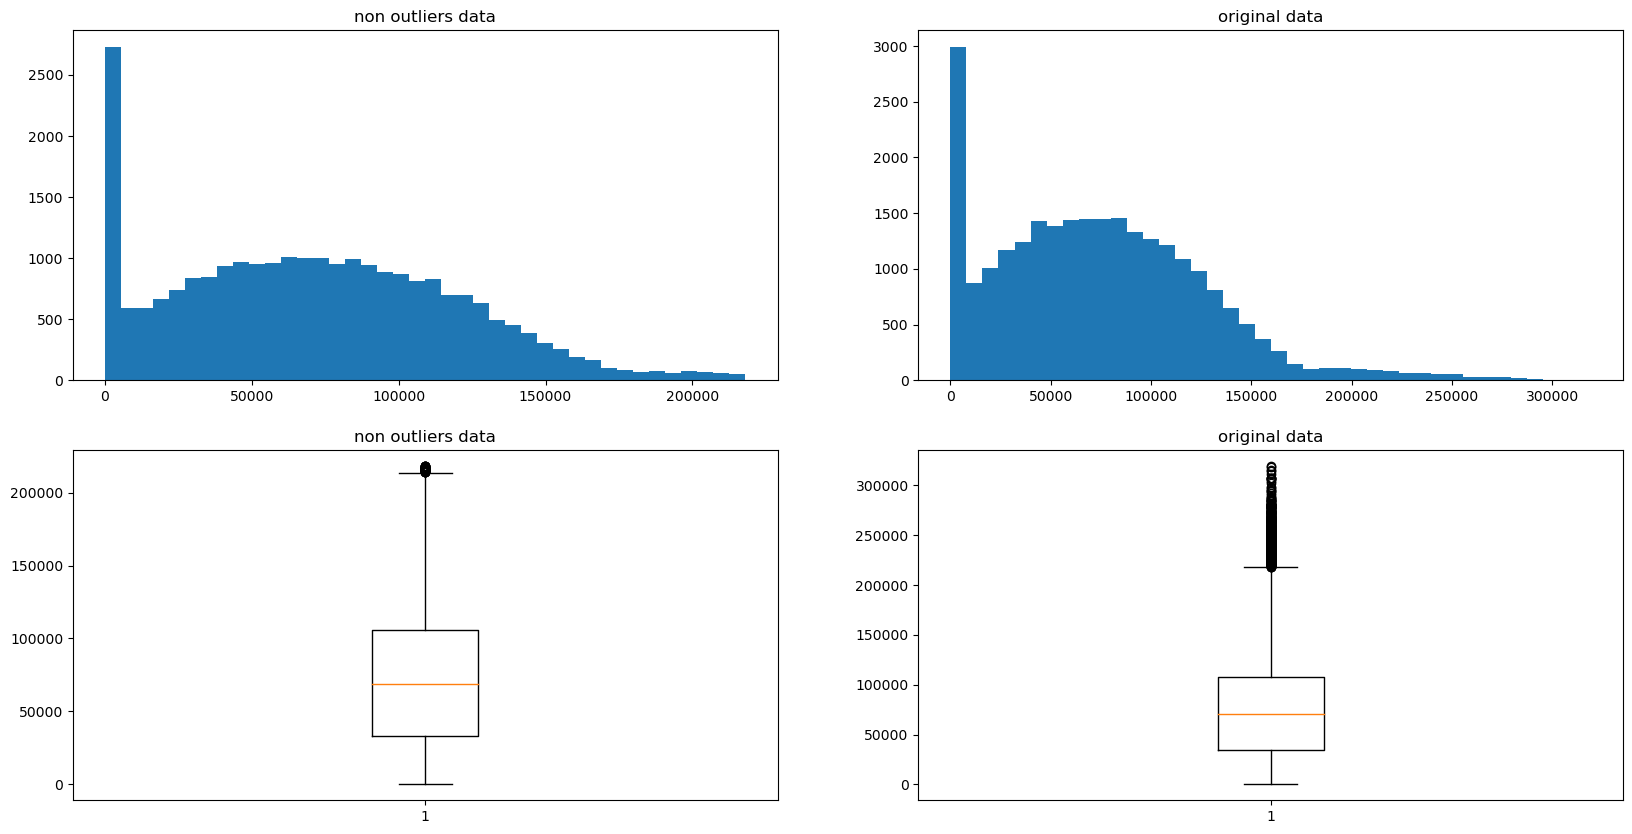

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('non outliers data')
plt.hist(non_outliers_df['prevailing_wage'],bins=40)

plt.subplot(2,2,2)
plt.title('original data')
plt.hist(visa_df['prevailing_wage'],bins=40)

plt.subplot(2,2,3)
plt.title('non outliers data')
plt.boxplot(non_outliers_df['prevailing_wage'])

plt.subplot(2,2,4)
plt.title('original data')
plt.boxplot(visa_df['prevailing_wage'])
plt.show

$CASE:-2$:

**IMPUT WITH MEDIAN**

- we got pre_wage has 427 outliers
- we replace those 427 with median value of pre_wages

In [37]:
median=round(visa_df['prevailing_wage'].median(),2)
median

70308.21

In [40]:
replace=visa_df['prevailing_wage'].replace(visa_df.prevailing_wage.values > 70308.21 ,0, inplace=True)
replace

In [41]:
for i in visa_df['prevailing_wage'].values:
    print(i)

592.2029
83425.65
122996.86
83434.03
149907.39
78252.14
53635.39
418.2298
74362.19
67514.76
83588.56
70813.09
28663.05
107196.03
220081.73
74108.02
3706.79
16132.61
150441.13
79948.12
71128.98
137694.98
45642.39
90108.38
71286.04
99489.65
86332.95
103029.33
40925.86
189190.48
79594.12
135866.13
72077.57
81921.18
225569.73
92421.92
2490.12
110817.26
50960.01
125336.9
39633.32
156326.33
43630.58
54614.42
28989.87
22924.91
61567.75
156251.17
86022.02
49565.37
66191.41
95623.2
115014.05
35018.04
230.8072
113799.64
85854.09
14174.04
47176.84
4949.28
67410.59
58791.58
103.2216
62591.57
102919.59
123468.56
82324.64
5319.49
153019.94
38059.89
230.327
61521.92
121316.5
122540.55
47170.76
330.3743
2927.34
107781.48
590.0203
194176.83
102073.81
113882.38
70778.82
84125.48
174014.59
34213.17
79813.05
113327.34
78893.64
140290.16
111926.01
125880.21
527.8901
49357.95
69335.2
99737.18
91449.62
34494.86
395.995
159645.51
28243.79
43421.88
80253.78
115235.95
95200.86
41613.52
64137.41
66295.43
97520.0

In [45]:
new_values=[]
median=np.median(visa_df['prevailing_wage'])
for i in visa_df['prevailing_wage'].values:
    if i>UB or i<LB:
        new_values.append(median)
    else:
        new_values.append(i)
        
new_values    

[592.2029,
 83425.65,
 122996.86,
 83434.03,
 149907.39,
 78252.14,
 53635.39,
 418.2298,
 74362.19,
 67514.76,
 83588.56,
 70813.09,
 28663.05,
 107196.03,
 70308.20999999999,
 74108.02,
 3706.79,
 16132.61,
 150441.13,
 79948.12,
 71128.98,
 137694.98,
 45642.39,
 90108.38,
 71286.04,
 99489.65,
 86332.95,
 103029.33,
 40925.86,
 189190.48,
 79594.12,
 135866.13,
 72077.57,
 81921.18,
 70308.20999999999,
 92421.92,
 2490.12,
 110817.26,
 50960.01,
 125336.9,
 39633.32,
 156326.33,
 43630.58,
 54614.42,
 28989.87,
 22924.91,
 61567.75,
 156251.17,
 86022.02,
 49565.37,
 66191.41,
 95623.2,
 115014.05,
 35018.04,
 230.8072,
 113799.64,
 85854.09,
 14174.04,
 47176.84,
 4949.28,
 67410.59,
 58791.58,
 103.2216,
 62591.57,
 102919.59,
 123468.56,
 82324.64,
 5319.49,
 153019.94,
 38059.89,
 230.327,
 61521.92,
 121316.5,
 122540.55,
 47170.76,
 330.3743,
 2927.34,
 107781.48,
 590.0203,
 194176.83,
 102073.81,
 113882.38,
 70778.82,
 84125.48,
 174014.59,
 34213.17,
 79813.05,
 113327.34

In [47]:
visa_df['prevailing_wage_imputed']=new_values
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_imputed
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,592.2029
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,83425.6500
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,122996.8600
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,83434.0300
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,149907.3900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,77092.5700
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,70308.2100
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,146298.8500
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,86154.7700


<function matplotlib.pyplot.show(close=None, block=None)>

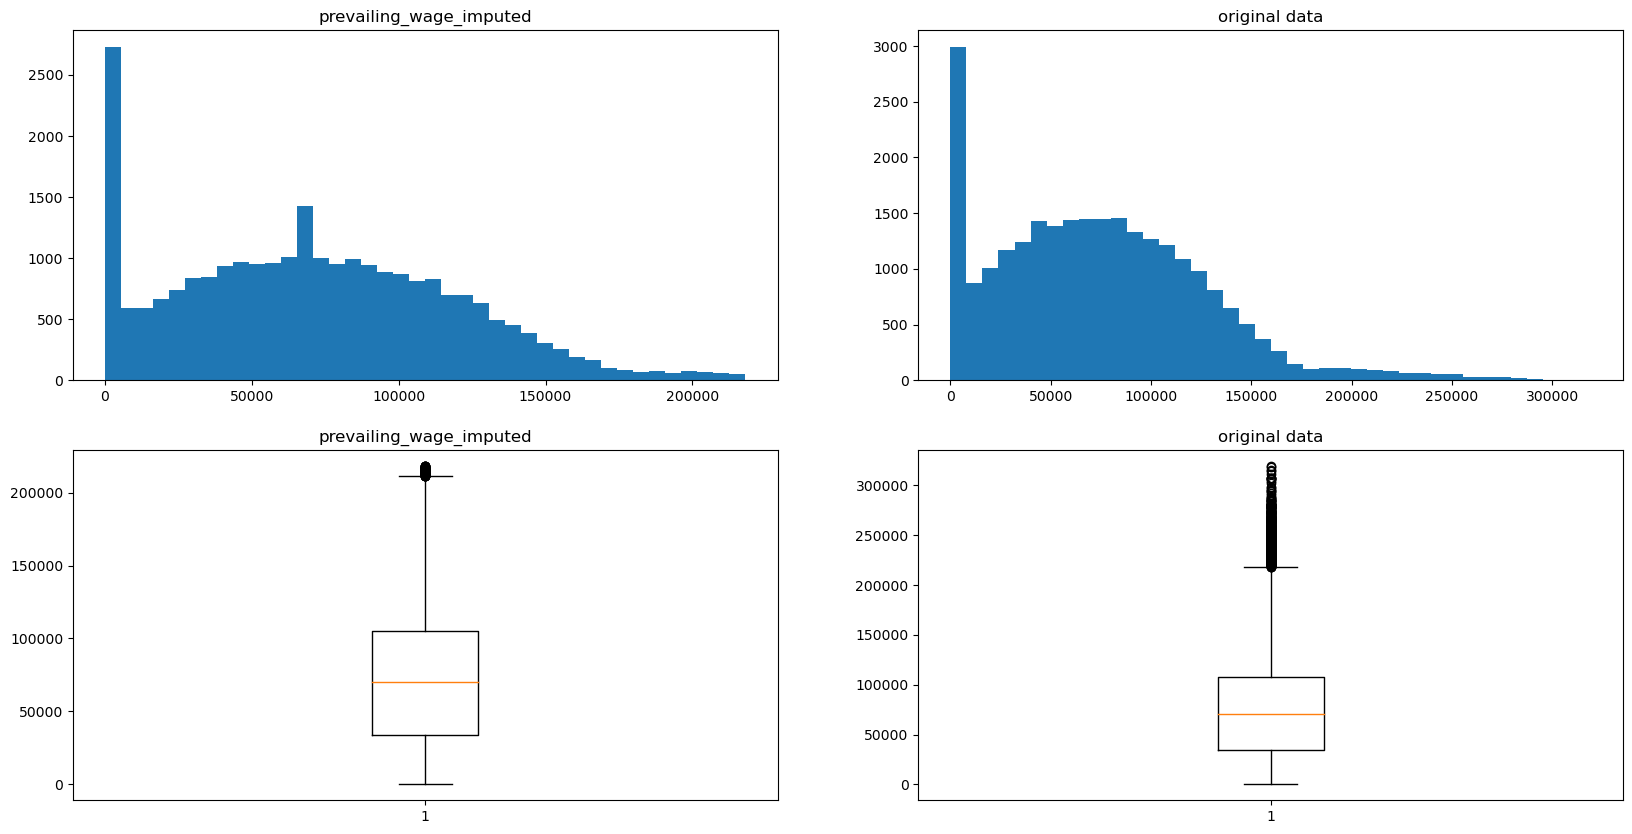

In [48]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('prevailing_wage_imputed')
plt.hist(visa_df['prevailing_wage_imputed'],bins=40)

plt.subplot(2,2,2)
plt.title('original data')
plt.hist(visa_df['prevailing_wage'],bins=40)

plt.subplot(2,2,3)
plt.title('prevailing_wage_imputed')
plt.boxplot(visa_df['prevailing_wage_imputed'])

plt.subplot(2,2,4)
plt.title('original data')
plt.boxplot(visa_df['prevailing_wage'])
plt.show